Analyzing Traffic Volume
The aim of this project is to determine the indicators of heavy traffic on 1-94 Traffic Dataset. 
This dataset on the  I-94 Interstate highway(https://en.wikipedia.org/wiki/Interstate_94) can be found from  UCI Machine Learning Repository(https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

In [1]:
import pandas as pd
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
print(traffic.head())
print(traffic.tail(5))
traffic.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

In the next exercise, we're going to plot a histogram to visualize the distribution of the traffic_volume column.
* When we use Matplotlib inside Jupyter, we also need to add the %matplotlib inline magic — this enables Jupyter to generate the graphs.

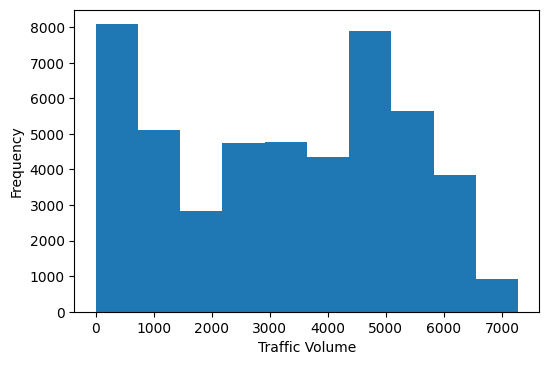

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
traffic['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.show()
traffic['traffic_volume'].describe()

Previously, we analyzed the distribution of traffic_volume and found the following:

About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
About 25% of the time, the traffic volume was four times as much (4,933 cars or more).
This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

We'll start by dividing the dataset into two parts:

Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)
While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [3]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'], format = "%Y-%m-%d %H:%M:%S")
print(traffic['date_time'].head)

<bound method NDFrame.head of 0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]>


In [11]:
traffic['hour'] = traffic['date_time'].dt.hour
print(traffic['hour'].head(24))


0      9
1     10
2     11
3     12
4     13
5     14
6     15
7     16
8     17
9     18
10    19
11    20
12    21
13    22
14    23
15     0
16     1
17     2
18     3
19     4
20     5
21     6
22     8
23     9
Name: hour, dtype: int64


In [14]:
day = traffic.copy()[(hour >= 7) & (hour < 19)]
print(day.shape)

(23877, 12)


In [18]:
night = traffic.copy()[(hour >= 19) | (hour <7)]
print(night.shape)

(24327, 12)


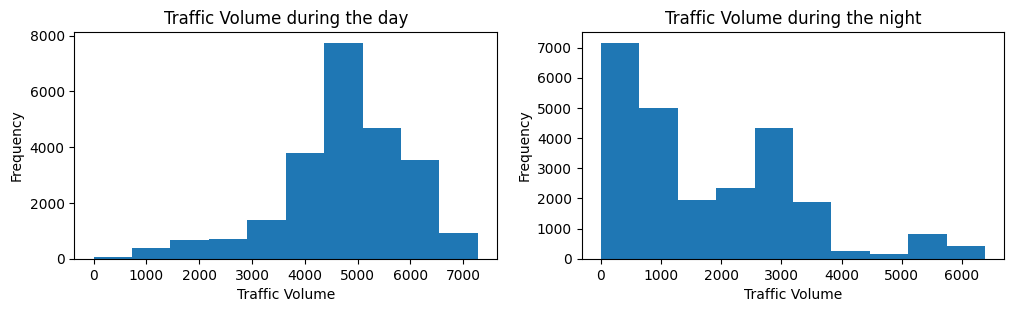

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

In [51]:
plt.figure(figsize = (12, 3))
plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.title('Traffic Volume during the day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.title('Traffic Volume during the night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

day['traffic_volume'].describe()
night['traffic_volume'].describe()

From the graphs above, the histograph with traffic volumes during the day is left skewed wich means that traffic is high, while that showing traffic volumes during the night is right skewed wich means that traffic is low.

Previously, we determined that the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward.
To start with, we'll determine how traffic volume changed according to:
1. Month
2. Day of the week
3. Time of the day

In [31]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

Graph showing average Traffic volume change each month

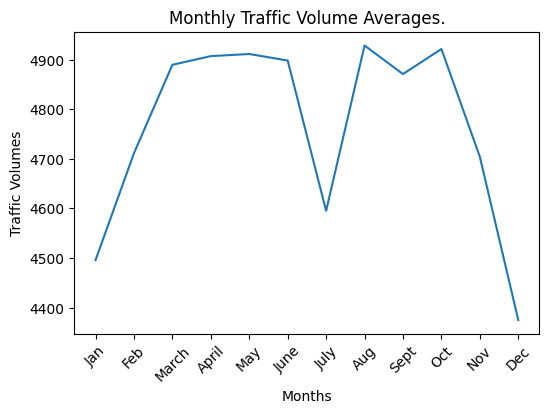

In [43]:
plt.plot(by_month.index, by_month['traffic_volume'])
plt.title('Monthly Traffic Volume Averages.')
plt.ylabel('Traffic Volumes')
plt.xlabel('Months')
plt.xticks(ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
          labels = ["Jan","Feb","March","April","May","June",
          "July","Aug","Sept","Oct","Nov","Dec"])
plt.xticks(rotation = 45)
plt.show()

From the graph above, the traffic valume falls down from around mid October and resumes normalsy at around mid February. This period is Winter season in this country.

Traffic volume averages for each day of the week:

In [44]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']
# 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

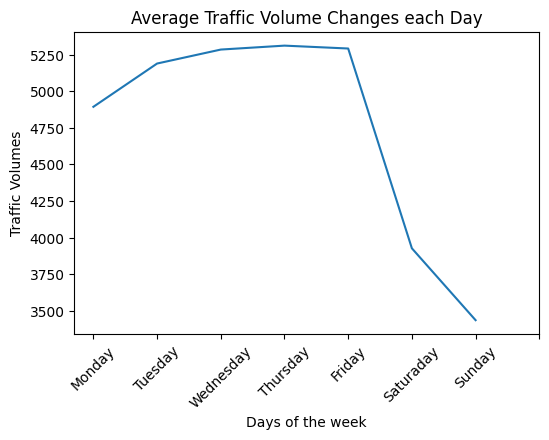

In [47]:
plt.plot(by_dayofweek.index, by_dayofweek['traffic_volume'])
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7], labels= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturaday', 'Sunday'])
plt.xticks(rotation = 45)
plt.title('Average Traffic Volume Changes each Day')
plt.xlabel('Days of the week')
plt.ylabel('Traffic Volumes')
plt.show()

From the graph above, Traffic volumes pick up on Monday and maintains a high quantity till mid Friday when there's a systematic drop to the lowest on Sunday. Thus we can conclude that traffic volume is significantly heavier on business days compared to the weekends.

In [49]:
#splitting the data based on the day type: business day or weekend.
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


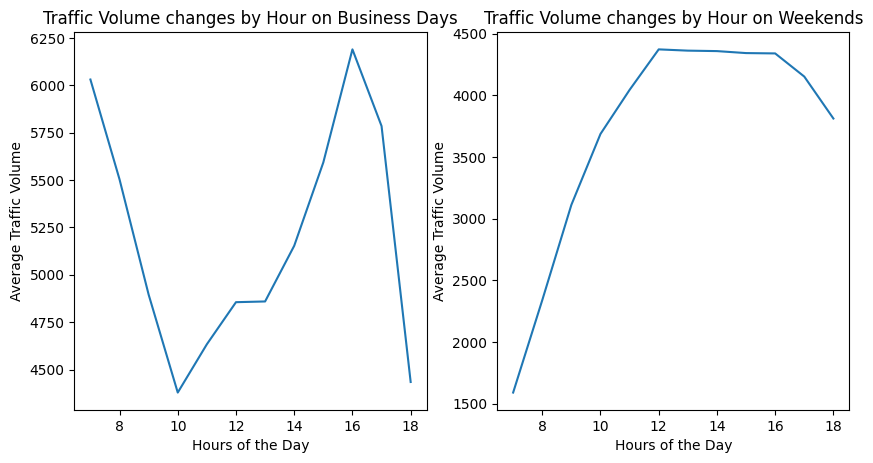

In [57]:
#line plots on a grid chart to visualize how the traffic volume changes by time of the day for both Business days and Weekends
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.plot(by_hour_business.index, by_hour_business['traffic_volume'])
plt.xlabel('Hours of the Day')
plt.ylabel('Average Traffic Volume')
plt.title('Traffic Volume changes by Hour on Business Days')

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend.index, by_hour_weekend['traffic_volume'])
plt.xlabel('Hours of the Day')
plt.ylabel('Average Traffic Volume')
plt.title('Traffic Volume changes by Hour on Weekends')
plt.show()

From the graphs above, traffic is heavy between 0700 hrs and 1600 hrs on Business days

So far, we've focused on finding time indicators for heavy traffic, and we reached the following conclusions:

The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
The traffic is usually heavier on business days compared to weekends.
On business days, the rush hours are around 7 and 16.

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [59]:
print(traffic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
 9   hour                 48204 non-null  int64         
 10  daytime              48204 non-null  bool          
 11  nighttime            48204 non-null  bool          
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 3.8+ MB
Non

In [62]:
#we'll only get correlation of traffic_volume with the weather columns with floats or integer values.
print(traffic['traffic_volume']. corr (traffic['temp']))
print(traffic['traffic_volume']. corr (traffic['rain_1h']))
print(traffic['traffic_volume']. corr (traffic['snow_1h']))
print(traffic['traffic_volume']. corr (traffic['clouds_all']))


0.13029879817112658
0.00471370236785923
0.0007334345358283799
0.06705377704283502


From the data above, there isn't any reliable indicator of heavy traffic.

To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description.

We're going to calculate the average traffic volume associated with each unique value in these two columns.
we grouped the data by weather_main and weather_description while using the mean as an aggregate function.

In [63]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

<BarContainer object of 11 artists>

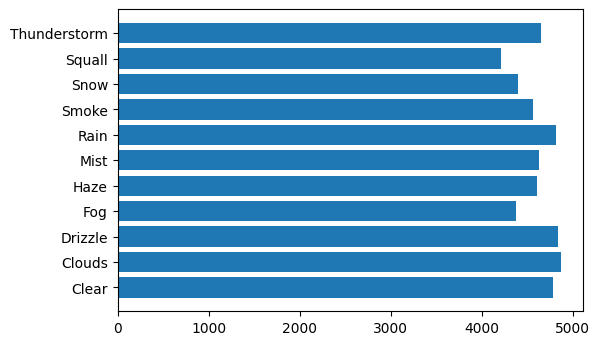

In [65]:
plt.barh(by_weather_main.index, by_weather_main['traffic_volume'])

From the graph above, there's no weather type where traffic volume exceeds 5,000 cars in the chart above, finding a heavy traffic indicator from it is difficult. 

<BarContainer object of 38 artists>

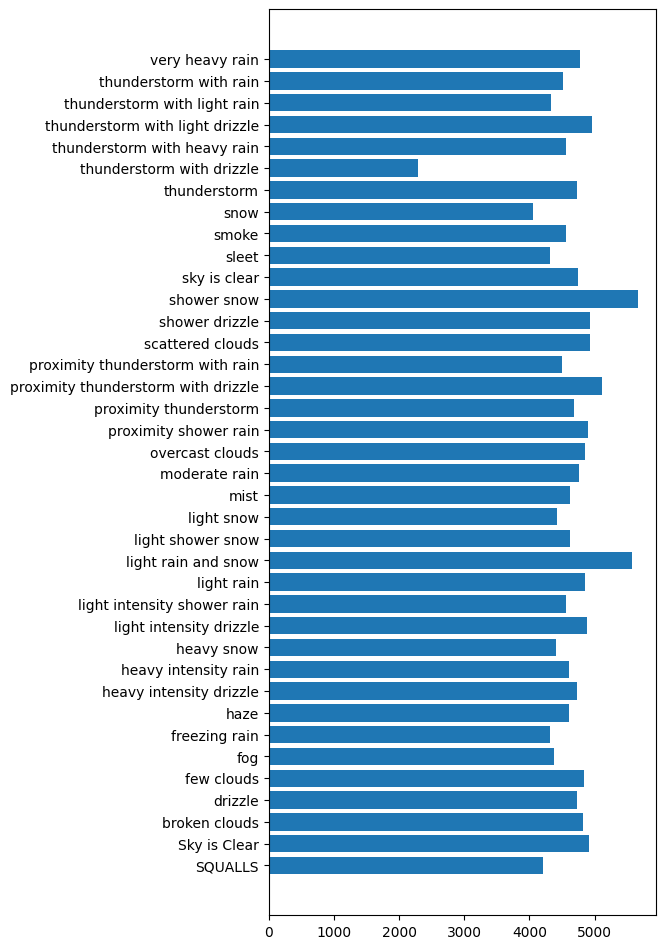

In [72]:
plt.figure(figsize = (5,12))
plt.barh(by_weather_description.index, by_weather_description['traffic_volume'])

However, for this column, it appears that 3 weather types affect traffic:
1. Light rain and snow spikes traffic to above 5000
2. Thunderstorm and drizzle reduces traffic to around 2000
3. Snow show spikes traffic to above 5000

It however, is not clear why these weather types affect the traffic, it's bad weather, but not that bad.


### Conclusion
In this poject I tried to find a few indicators of heavy traffic on the I-94 Interstate highway. I managed to find two types of indicators:

#### Time indicators

The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
The traffic is usually heavier on business days compared to the weekends.
On business days, the rush hours are around 7 and 16.
Weather indicators

#### Shower snow
Light rain and snow
Thunderstorm and Drizzle
